### DS4E-S21: Portfolio assignment: Part 2


Continents and Their Ramen Star Ratings - Is Asia's Ramen Rated Highest?

### Instructions summary

*Note: These are summarized instructions only. For the full assignment instructions, see the **[instructions document](https://docs.google.com/document/d/1z9xokYh49CiThWsUo-rNsVnUv76UKlBrsiob8hZ425w/edit?usp=sharing)**.*

This two-part portfolio assignment is an opportunity to apply the skills and concepts from class to real-world data, as well as to experience the joys (and occasionally other emotions!) of conducting original data science research. 

In **Part 2**, you'll evaluate your data in terms of ethics, conduct correlation, regression, and clustering analyses of your data, discuss your findings, and imagine possible next steps in your research.

To complete Part 2, answer the following questions using your dataset. We recommend using the same dataset you used for Part 1, but it is not required. If you are using your own dataset, and it is not the same dataset you used for Part 1, you must get permission from your TA prior to submission. Remember that **all code** must be commented clearly and thoroughly. You may use as many cells as you wish to answer each question.

Part 2 must be submitted through JupyterHub by **Monday**, **May 3**, at **9am ET**.

### Question 1

Describe any potential ethical concerns related to the data. Give an example of a variable that is NOT included in the dataset but that would raise ethical concerns if it were. Explain your reasoning.

A potential ethical concern is that we need to know that all data can be potentially identifiable and/or sensitive, especially since this data is public and explicitly includes its source. We are not aware if there was any given informed consent - did the participants agree to have this data be publicly shared on kaggle where anyone can download the data and use it for their own studies? Thus, the review givers were not given a chance to opt in or opt out of these studies. With trace data there's also a high risk of misconception, so it is difficult to say how and why exactly every participant gave the review they did, relative to what other comparison and considering what factors? This may depend on person to person. Thus, we need to be careful in thinking about what can be inferred from this data.

An example of a variable that is NOT included in this dataset but that would raise ethical concerns if it were is if the full names of the reviewers were included. That would make the data more traceable and less private, which would be a Violation of Respect for Persons, especially if no informed consent was given and the review givers want to remain anonymous.

## Linear Relationships

*Questions 2 through 5 relate to linear relationships between variables in your data.*

### Question 2

Name two variables from your dataset (these can be variables you described in Part 1, but don’t have to be). Calculate the correlation between them. 

*Note: It is okay if the variables you select do not turn out to be correlated or if they are negatively correlated.*

In [1]:
import pandas as pd # import pandas to work with dataset
data = pd.read_csv('ramen-ratings.csv') # load ramen-ratings.csv data
data.head() # show first 5 rows

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [2]:
import numpy as np # import numpy package to work with arrays
data['Stars'].replace('Unrated',np.nan,inplace=True) # replace unrated reviews with nan for easier future calculation
data['Stars'].unique() # now show all unique star ratings (none unrated now)

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', nan, '1.5', '3.25', '2', '0', '3', '0.5',
       '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3', '4.0',
       '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1', '0.9',
       '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8', '3.7',
       '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [3]:
data['Country'].unique() # show all unique countries to map them to their continent below

array(['Japan', 'Taiwan', 'USA', 'India', 'South Korea', 'Singapore',
       'Thailand', 'Hong Kong', 'Vietnam', 'Ghana', 'Malaysia',
       'Indonesia', 'China', 'Nigeria', 'Germany', 'Hungary', 'Mexico',
       'Fiji', 'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal',
       'Brazil', 'UK', 'Myanmar', 'Netherlands', 'United States',
       'Cambodia', 'Finland', 'Sarawak', 'Philippines', 'Sweden',
       'Colombia', 'Estonia', 'Holland', 'Poland', 'Dubai'], dtype=object)

In [4]:
# create new variable that converts country to an integer based on the continent it belongs in and its closeness to Asia

# all based on google maps data! ( https://www.google.com/maps : search for distance between Asia and each continent included  in this data)

# Asia - 0
# Europe - 1 ( part of Eurasia )
# Oceania - 2 ( ~ 4697 miles from Asia )
# Africa - 3 ( ~ 5231 miles from Asia )
# North America - 4 ( ~ 6122 miles from Asia )
# South America - 5 ( ~ 10188 miles from Asia )

country_int = list() # init empty list

# loop over all rank values and create numeric list
for val in data['Country']:
    if val == 'Japan': # in Asia
        country_int.append(0)
    elif val == 'Taiwan': # in Asia
        country_int.append(0)
    elif val == 'USA': # in North America
        country_int.append(4) 
    elif val == 'India': # in Asia
        country_int.append(0)
    elif val == 'South Korea': # in Asia
        country_int.append(0)
    elif val == 'Singapore': # in Asia
        country_int.append(0) 
    elif val == 'Thailand': # in Asia
        country_int.append(0)
    elif val == 'Hong Kong': # in Asia
        country_int.append(0)
    elif val == 'Vietnam': # in Asia
        country_int.append(0)
    elif val == 'Ghana': # in Africa
        country_int.append(3) 
    elif val == 'Malaysia': # in Asia
        country_int.append(0)
    elif val == 'Indonesia': # in Asia
        country_int.append(0)
    elif val == 'China': # in Asia
        country_int.append(0)
    elif val == 'Nigeria': # in Africa
        country_int.append(3) 
    elif val == 'Germany': # in Europe
        country_int.append(1) 
    elif val == 'Hungary': # in Europe
        country_int.append(1) 
    elif val == 'Mexico': # in North America
        country_int.append(4)
    elif val == 'Fiji': # in Oceania
        country_int.append(2) 
    elif val == 'Australia': # in Oceania
        country_int.append(2) 
    elif val == 'Pakistan': # in Asia
        country_int.append(0)
    elif val == 'Bangladesh': # in Asia
        country_int.append(0)
    elif val == 'Canada': # in North America
        country_int.append(4)
    elif val == 'Nepal': # in Asia
        country_int.append(0) 
    elif val == 'Brazil': # in South America
        country_int.append(5) 
    elif val == 'UK': # in Europe
        country_int.append(1)
    elif val == 'Myanmar': # in Asia
        country_int.append(0)
    elif val == 'Netherlands': # in Europe
        country_int.append(1)
    elif val == 'United States': # in North America
        country_int.append(4)
    elif val == 'Cambodia': # in Asia
        country_int.append(0) 
    elif val == 'Finland': # in Europe
        country_int.append(1)
    elif val == 'Sweden': # in Euorpe
        country_int.append(1)
    elif val == 'Sarawak': # in Asia
        country_int.append(0)
    elif val == 'Philippines': # in Asia
        country_int.append(0) 
    elif val == 'Sweden': # in Europe
        country_int.append(1)
    elif val == 'Colombia': # in South America
        country_int.append(5)
    elif val == 'Estonia': # in Europe
        country_int.append(1)
    elif val == 'Holland': # in Europe
        country_int.append(1)
    elif val == 'Poland': # in Europe
        country_int.append(1)
    elif val == 'Dubai': # in Asia
        country_int.append(0) 
    else: # if we have something not in our categories!
        country_int.append('')
        print('Missing value found.')
    
# add this as a column to our dataframe
data['Country_Int'] = country_int
data.head() # show first 5 rows with new column added to dataset

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Country_Int
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN,0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN,4
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,0
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN,0


In [5]:
data['Stars'] = data['Stars'].astype(float) # convert star ratings from string to floats
data.dropna(subset = ['Country_Int'], inplace = True) # drop nan from Country_Int column
data.dropna(subset = ['Stars'], inplace = True) # drop nan from Stars column
data['Stars'].unique() # now show all unique star ratings (no nan now)

array([3.75 , 1.   , 2.25 , 2.75 , 4.75 , 4.   , 0.25 , 2.5  , 5.   ,
       4.25 , 4.5  , 3.5  , 1.5  , 3.25 , 2.   , 0.   , 3.   , 0.5  ,
       3.8  , 4.3  , 2.3  , 3.3  , 1.75 , 0.75 , 1.25 , 1.1  , 2.1  ,
       0.9  , 3.1  , 4.125, 3.125, 2.125, 2.9  , 0.1  , 2.8  , 3.7  ,
       3.4  , 3.6  , 2.85 , 3.2  , 3.65 , 1.8  ])

In [6]:
import scipy.stats as sp # for p-values and correlations
stat, pval = sp.pearsonr(data['Stars'], data['Country_Int']) # calculate correlation and p-value
print('Correlation is: {:.17}'.format(stat)) # print output

Correlation is: -0.14815642809589183


### Question 3

Calculate a linear regression between one dependent variable from your dataset and at least one independent variable from your dataset (these can be the same variables as in Q2). 

In [7]:
# taken from Lecture 18 (DS4E--L18--regression Jupyter Notebook)

import statsmodels.formula.api as smf # import package for OLS
import statsmodels.api as sm
data['Stars'] = pd.to_numeric(data['Stars']) # convert Stars column to numeric values
results = smf.ols('Stars ~ Country_Int', data = data).fit() # estimates our OLS regression
# our DV (Y variable) is Stars and our IV (X variable) is Country_Int
results.summary() # prints a table of results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Stars   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     57.79
Date:                Wed, 05 May 2021   Prob (F-statistic):           4.06e-14
Time:                        04:15:19   Log-Likelihood:                -3666.7
No. Observations:                2577   AIC:                             7337.
Df Residuals:                    2575   BIC:                             7349.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7270      0.022    169.770      0.000       3.684       3.770
Country_Int    -0.1029      0.014     -7.602      0.000      -0.129      -0.076
==============================================================================
Omnibus:                      441.433   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              804.658
Skew:                          -1.068   Prob(JB):                    1.87e-175
Kurtosis:                       4.711   Cond. No.                         1.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question 4

Plot your data with your independent variable on the x-axis and the dependent variable on the y-axis. Plot a line indicating the fit of your regression. You may use built-in functions to calculate this line.

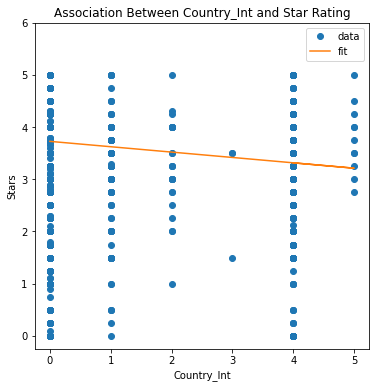

In [8]:
# taken from Lecture 18 (DS4E--L18--regression Jupyter Notebook)

import matplotlib.pyplot as plt # package for plot

# we can use .params to retrieve these values from the regression output
# save these as variables
intercept = results.params['Intercept'] 
slope = results.params['Country_Int']

X = data['Country_Int'] # use our observed x vals
y_pred = [intercept + (slope * x_i) for x_i in X] # calculate y for every x
y_pred2 = results.predict(data['Country_Int'])

# ------------ Plot ------------ #
plt.figure(figsize=(6,6)) # make square (6 by 6)!

# plot data
plt.plot(data['Country_Int'], data['Stars'],
        marker='o', lw=0, # no line, only markers
        label = 'data')

# plot fit line
plt.plot(X, y_pred2,
        label='fit')

# set the axes to have the same range
plt.xticks(range(0,6, 1)) # for better scaling of x-axis ticks         
plt.yticks(range(0,7, 1)) # for better scaling of y-axis ticks   

# label axes & title
plt.xlabel('Country_Int')
plt.ylabel('Stars')

plt.title('Association Between Country_Int and Star Rating')
plt.legend(loc='upper right') # legend on upper right hand side of plot

plt.show() # display plot

### Question 5

Interpret the results from Q3 and Q4. How does a change in the independent variable relate to a change in the dependent variable? Is that relationship significant? Are there omitted variables which may be biasing these results?

The regression coefficient for the variable Country_Int is -0.1029. So, for every 1 unit increase in Country_Int (getting "one continent further away" from Asia), there will be a -0.1029 change in Star rating, indicating that there is a very slight negative correlation.
Since the p-value for Country_Int is 0.000 (below 0.05 - the significance threshold that determines whether the correlation coefficient is or is not significantly different from 0), we reject the null hypothesis, which is that there is no effect of location from Asia (Country_Int) on their ramen star ratings. So, the correlation coefficient is significantly different from 0, implying the relationship is significant.

The omitted variable that may be biasing these results is the count of star ratings for every Country_Int. There is an uneven distribution of star ratings per each Country_Int (for example, compare Country_Int 0 and Country_Int 3). This makes it difficult to measure and conclude if the continents "further from Asia" truly have a lower ramen rating or they simply lack data. 

## Clustering

*Questions 6 through 9 relate to k-means clustering.*

### Question 6

Use `sklearn` to write a function that calculates k-means clustering for an arbitrary value of k. Your function should return the fitted estimator.

In [9]:
# Based on Lecture 20 (DS4E—L20—Validation Jupyter Notebook)

# stats models for good measure
import statsmodels.api as sm                    
import statsmodels.formula.api as smf  

# SciKit Learn packages
from sklearn.model_selection import train_test_split # for splitting data
from sklearn.preprocessing import StandardScaler     # feature scaling
from sklearn import metrics                          # for evaluation metrics

from sklearn.linear_model import LinearRegression    # linear regression
from sklearn.neighbors import KNeighborsClassifier   # knn
from sklearn.cluster import KMeans                   # kmeans

Scaler = StandardScaler()                
X = data[['Country_Int']].values # matrix of X values
scaled_features = Scaler.fit_transform(X) # scale our X variable
scaled_features[:5] # show first 5 rows of rescaled X variables 

def ramen_k_means(k):
    kmeans = KMeans(n_clusters=k) # init k-means object
    kmeans.fit(scaled_features)  # run k-means!
    return kmeans
    

### Question 7

Plot the Sum of the Squared Error (SSE) for 1-10 clusters using the function you wrote in Q6. Use the “elbow method” to identify a number of clusters appropriate for your data. Be sure to scale your data before calculating the SSE.

/opt/conda/envs/dsua-111/lib/python3.7/site-packages/ipykernel_launcher.py:23: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
/opt/conda/envs/dsua-111/lib/python3.7/site-packages/ipykernel_launcher.py:23: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
/opt/conda/envs/dsua-111/lib/python3.7/site-packages/ipykernel_launcher.py:23: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
/opt/conda/envs/dsua-111/lib/python3.7/site-packages/ipykernel_launcher.py:23: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.


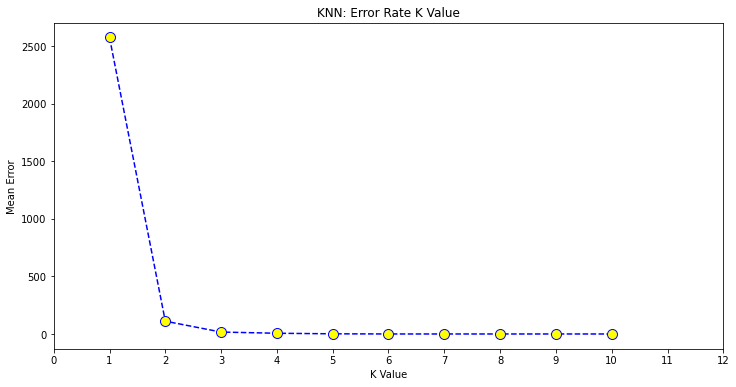

In [10]:
error = list() # create a list for the error

for k in range(1,11): # 1-10 clusters
    output = ramen_k_means(k) # save output
    error.append(output.inertia_) # append onto error list

# plot error
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(error)+1), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10) # styling and setting range to start at 1

plt.yticks(np.arange(0, 3000, 500)) # start y ticks at 0
plt.xticks(np.arange(0, 13, 1))  # integer x ticks

# title & label axes
plt.title('KNN: Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show() # display plot

In [11]:
# "elbow method” to identify a number of clusters appropriate for the data
from kneed import KneeLocator # import package necessary for this method
kl = KneeLocator(range(1, 11), error, 
                 curve="convex", direction="decreasing")
kl.elbow # display number of appropriate clusters

2

### Question 8

Plot the Silhouette Coefficient for 2-10 clusters using the function you wrote in Q6. Be sure to scale your data before calculating the Silhouette Coefficient. How many clusters does this method suggest is optimal? NOTE: Depending on your data, Q7 and Q8 may not yield the same number of clusters.

/opt/conda/envs/dsua-111/lib/python3.7/site-packages/ipykernel_launcher.py:23: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
/opt/conda/envs/dsua-111/lib/python3.7/site-packages/ipykernel_launcher.py:23: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
/opt/conda/envs/dsua-111/lib/python3.7/site-packages/ipykernel_launcher.py:23: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
/opt/conda/envs/dsua-111/lib/python3.7/site-packages/ipykernel_launcher.py:23: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.


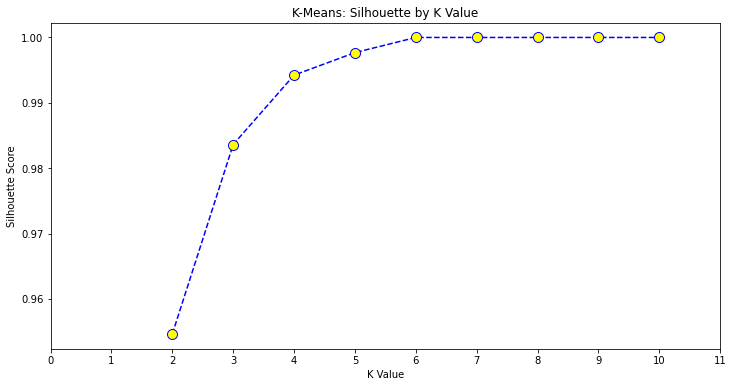

In [12]:
silhouette = list() # silhouette score

# initialize our k-means algorithm
kmeans = KMeans(
    init="random",
    n_clusters=2, # we'll specify 2 clusters ( as recommended by "elbow method")
    n_init=10,
    max_iter=300,
random_state =42) # random_state set to 42

# run k-means!
kmeans.fit(scaled_features) 

for k in range(2,11): # silhouette requires at least 2 clusters and plots the Silhouette Coefficient for 2-10 clusters
    output = ramen_k_means(k) # save output in variable
    score = metrics.silhouette_score(scaled_features, output.labels_) # calc silhouette score
    silhouette.append(score) # save score

# Silhouette score plot
plt.figure(figsize=(12, 6))
plt.plot(range(2, len(silhouette)+2), silhouette, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)

plt.xticks(np.arange(0, 12, 1)) 
# label title and axes
plt.title('K-Means: Silhouette by K Value')
plt.xlabel('K Value')
plt.ylabel('Silhouette Score')
plt.show() # display plot

# plot shows that the optimal cluster is at 6 ( the maximum )

### Question 9

Use your answers to Q7 & Q8 to select a reasonable value for k (must be at least 2). Calculate cluster assignments for each of your observations using your function from Q6. Use two variables from your dataset to plot your data in two dimensional space (ie, variable 1 x variable 2). Color code your data based on cluster assignments.

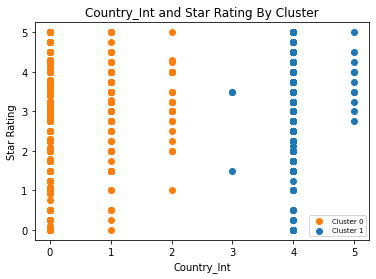

In [13]:
# run k-means!
kmeans.fit(scaled_features) # display output
data['clusters'] = kmeans.labels_
# plot just the clusters
# note that cluster LABELS will be random!

colors ={ # show each cluster in a different color
    0 : 'C1',
    1 : 'C0'
    
}

# for each cluster
for i in range(2): # we will use 2 clusters because that is the recommended amount returned by the elbow method previously
    subset = data[data['clusters'] == i]
    plt.scatter(subset['Country_Int'], # x-variable
                subset['Stars'], # y-variable
                label='Cluster {}'.format(i), # cluster number labeled as i traverses through the loop
               color=colors[i])
    
plt.xlabel('Country_Int') # label x-axis
plt.ylabel('Star Rating') # label y-axis

plt.title('Country_Int and Star Rating By Cluster') # label title
plt.legend(loc='lower right', prop={'size': 7}) # set legend
    
plt.show() # display plot

## Conclusion

*Question 10 can draw on any of the analyses done in Q1-Q9.*

### Question 10

What did you learn from this dataset? Your answer may (but is not required to) address any of the following questions: Does a linear model appear to be a good fit for your data? Does your data appear to cluster in a meaningful way? What limitation do you see to this dataset? What additional analyses might be interesting (Describe, you don’t need to do these)? 

I learned that this dataset was messy to work with and difficult to interpret which makes me understand the phrase of why we say "the messy world of data" a lot better. I learned how to run a regression on a real-world data set and utilize plots to make better sense of the data. I did not find that there was a strong correlation between Country_Int and Stars even though the p-value (0.00) was < 0.05

Thus, a linear model does not appear to be a good fit for the data. Interpreting my results is challenging because my IV is Country Int (where higher values indicate they are further from Asia), which is a discrete variable that only takes integer values. So, I was still able to run a regression with this IV, but it was a limitation in my dataset as it made interpreting my results a bit difficult. My regression tells me that the expected effect on Stars for a one-unit increase in Country Int/Content is a 0.1029 decrease. "A one-unit increase in Country Int" itself is difficult to measure/interpret because though it means we are getting further away from Asia, there's no precise translation of a one-unit increase into the same actual distance since there is no precise way of measuring the distance between two continents. In other words, "2" is not necessarily "twice as far from Asia" as "1". However, this analysis still shines some insight into this relationship even though the graphs does not show an obvious association, as there is in fact a (very) slight negative correlation between distance from Asia and stars as shown by the correlation coefficient and predicted fitted line plotted in Question 4. 